In [8]:
import CBIS as cbis
import Randomized_Quicksort as rq
import time
import pandas as pd
import random
import sys
import copy

# Generate a randomized dataset of a given size
def generate_randomized_data(size):
    return [random.randint(1, size) for i in range(size)]

# Generate a sorted dataset of a given size
def generate_sorted_data(size):
    # return [i for i in range(1, size + 1)]
    a_list = []
    number = 0
    for i in range(1, size + 1):
        number += random.randint(0, 10)
        a_list.append(number)
        i += 1
    return a_list

# Generate a reversed dataset of a given size
def generate_reversed_data(size):
    # return [i for i in range(size, 0, -1)]
    a_list = []
    number = size
    for i in range(1, size + 1):
        number -= random.randint(0, 10)
        a_list.append(number)
        i += 1
    return a_list

def get_memory_usage(obj):
    return sys.getsizeof(obj)

# Define dataset sizes
dataset_sizes = [200, 2000, 20000]

datasets = {}

# Generate the datasets
for size in dataset_sizes:
    randomized_data = generate_randomized_data(size)
    sorted_data = generate_sorted_data(size)
    reversed_data = generate_reversed_data(size)
    
    datasets[f"Randomized_{size}"] = randomized_data
    datasets[f"Sorted_{size}"] = sorted_data
    datasets[f"Reversed_{size}"] = reversed_data

# Example: Access the data using the dataset name
# print("First 10 elements of the Randomized_200 dataset:")
# print(datasets["Randomized_200"][:10])

if __name__ == "__main__":
    print('Experiment 1: Dataset generation ...')

    running_time = []
    memory_usage = []
    datasets_to_save = []

    for k in range (5):
        datasets = {'Randomized_200' : generate_randomized_data(200), 'Sorted_200' : generate_sorted_data(200), 'Reversed_200' : generate_reversed_data(200), 
                    'Randomized_2000' : generate_randomized_data(2000), 'Sorted_2000' : generate_sorted_data(2000), 'Reversed_2000' : generate_reversed_data(2000), 
                    'Randomized_20000' : generate_randomized_data(20000), 'Sorted_20000' : generate_sorted_data(20000), 'Reversed_20000' : generate_reversed_data(20000)}
        datasets_to_save.append(datasets)
        
        counter = 0
        for key, value in datasets.items():         
            value2 = value.copy()

            start_time_cbis = time.time()
            start_memory_cbis = get_memory_usage(value)

            cbis.insertion_sort(value)

            end_time_cbis: int = time.time()
            duration_mili_cbis: int = (end_time_cbis * 1000 - start_time_cbis * 1000)
            end_memory_cbis = get_memory_usage(value)
            memory_usg_cbis = end_memory_cbis - start_memory_cbis

            start_time_rq = time.time()
            start_memory_rq = get_memory_usage(value2)

            rq.quicksort(value2, 0, len(value2) - 1)

            end_time_rq: int = time.time()
            duration_mili_rq = (end_time_rq * 1000 - start_time_rq * 1000)
            end_memory_rq = get_memory_usage(value2)
            memory_usg_rq = end_memory_rq - start_memory_rq
            
            # Store the results in the list
            running_time.append({
                'Dataset Type': key.split('_')[0],
                'Dataset Size': int(key.split('_')[1]),
                'Algorithm': 'CBIS',
                'Duration (ms)': duration_mili_cbis
            })

            memory_usage.append({
                'Dataset Type': key.split('_')[0],
                'Dataset Size': int(key.split('_')[1]),
                'Algorithm': 'CBIS',
                'Additional Memory': memory_usg_cbis,
                'Start Memory': start_memory_cbis,
                'End Memory': end_memory_cbis
            })

            running_time.append({
                'Dataset Type': key.split('_')[0],
                'Dataset Size': int(key.split('_')[1]),
                'Algorithm': 'Randomized Quicksort',
                'Duration (ms)': duration_mili_rq
            })

            memory_usage.append({
                'Dataset Type': key.split('_')[0],
                'Dataset Size': int(key.split('_')[1]),
                'Algorithm': 'Randomized Quicksort',
                'Additional Memory': memory_usg_rq,
                'Start Memory': start_memory_rq,
                'End Memory': end_memory_rq
            })

    # Create a DataFrame from the list of dictionaries
    df_datasets = pd.DataFrame(datasets_to_save)
    df_datasets.to_csv("datasets.csv", index=True)

    df_time = pd.DataFrame(running_time)
    df_time.to_csv("sorting_time.csv", index=True)

    df_pivot_time = df_time.pivot_table(index=['Dataset Type', 'Dataset Size'], values='Duration (ms)', columns='Algorithm')
    df_pivot_time.to_csv("sorting_time_pivoted.csv", index=True)

    df_memory = pd.DataFrame(memory_usage)
    df_memory.to_csv("sorting_memory.csv", index=True)

    df_pivot_memory = df_memory.pivot_table(index=['Dataset Type', 'Dataset Size'], values=['Additional Memory', 'Start Memory', 'End Memory'], columns='Algorithm')
    df_pivot_memory.to_csv("sorting_memory_pivoted.csv", index=True)
    


Experiment 1: Dataset generation ...


In [9]:
df_pivot_memory

Additional Memory                      End Memory  \
Algorithm                              CBIS Randomized Quicksort       CBIS   
Dataset Type Dataset Size                                                     
Randomized   200                        0.0                  0.0     1656.0   
             2000                       0.0                  0.0    16184.0   
             20000                      0.0                  0.0   173016.0   
Reversed     200                        0.0                  0.0     1656.0   
             2000                       0.0                  0.0    16184.0   
             20000                      0.0                  0.0   173016.0   
Sorted       200                        0.0                  0.0     1656.0   
             2000                       0.0                  0.0    16184.0   
             20000                      0.0                  0.0   173016.0   

                                               Start Memory  \
Algorithm                 Randomized Quicksort         CBIS   
Dataset Type Dataset Size                                     
Randomized   200                        1656.0       1656.0   
             2000                      16056.0      16184.0   
             20000                    160056.0     173016.0   
Reversed     200                        1656.0       1656.0   
             2000                      16056.0      16184.0   
             20000                    160056.0     173016.0   
Sorted       200                        1656.0       1656.0   
             2000                      16056.0      16184.0   
             20000                    160056.0     173016.0   

                                                
Algorithm                 Randomized Quicksort  
Dataset Type Dataset Size                       
Randomized   200                        1656.0  
             2000                      16056.0  
             20000                    160056.0  
Reversed     200                        1656.0  
             2000                      16056.0  
             20000                    160056.0  
Sorted       200                        1656.0  
             2000                      16056.0  
             20000                    160056.0

In [12]:
df_pivot_time

Algorithm                          CBIS  Randomized Quicksort
Dataset Type Dataset Size                                    
Randomized   200               0.800098              0.598828
             2000             90.006836              7.396729
             20000          8902.343018             88.591211
Reversed     200               1.401465              0.598535
             2000            161.900879              6.801172
             20000         17155.832715             78.193604
Sorted       200               0.199854              0.400391
             2000              8.198730              5.601562
             20000            98.999463             72.595410

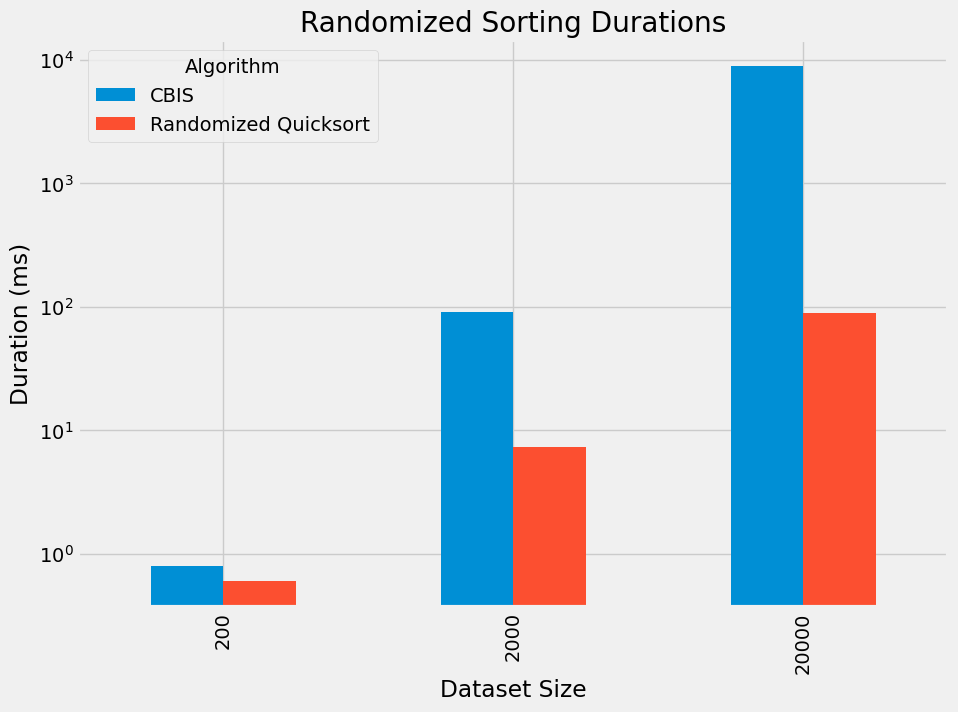

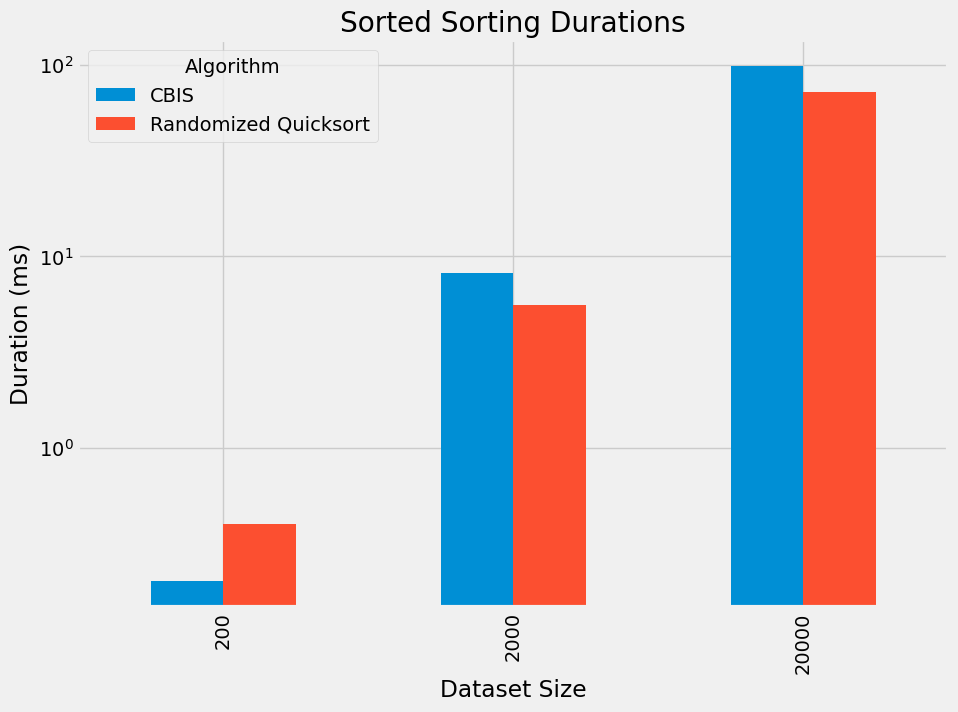

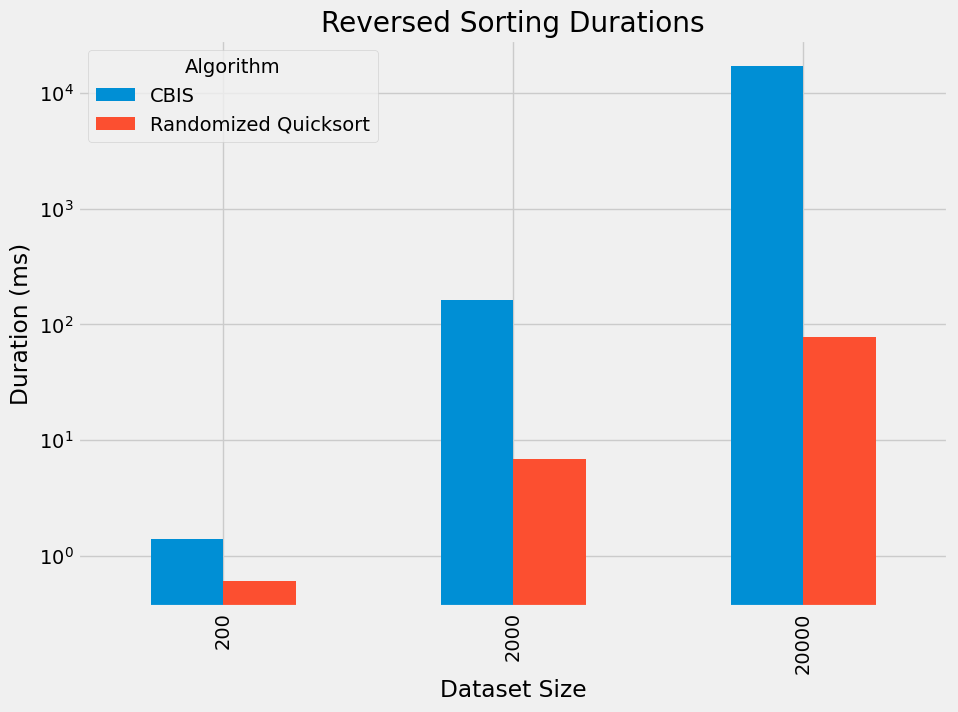

In [18]:
import matplotlib.pyplot as plt
# Set the style
plt.style.use('fivethirtyeight')

# Create a figure for each graph
fig1, ax1 = plt.subplots(figsize=(10, 7))
fig2, ax2 = plt.subplots(figsize=(10, 7))
fig3, ax3 = plt.subplots(figsize=(10, 7))

# Dataframe columns for 'Randomized', 'Sorted', and 'Reversed'
randomized_data = df_pivot_time.loc['Randomized']
sorted_data = df_pivot_time.loc['Sorted']
reversed_data = df_pivot_time.loc['Reversed']

# Create bar plots for each dataset type in separate graphs
randomized_data.plot(kind='bar', logy=True, ax=ax1)
sorted_data.plot(kind='bar', logy=True, ax=ax2)
reversed_data.plot(kind='bar', logy=True, ax=ax3)

# Set titles and labels for each graph
ax1.set_title('Randomized Sorting Durations')
ax1.set_xlabel('Dataset Size')
ax1.set_ylabel('Duration (ms)')

ax2.set_title('Sorted Sorting Durations')
ax2.set_xlabel('Dataset Size')
ax2.set_ylabel('Duration (ms)')

ax3.set_title('Reversed Sorting Durations')
ax3.set_xlabel('Dataset Size')
ax3.set_ylabel('Duration (ms)')

# Show the plots for each graph
plt.show()

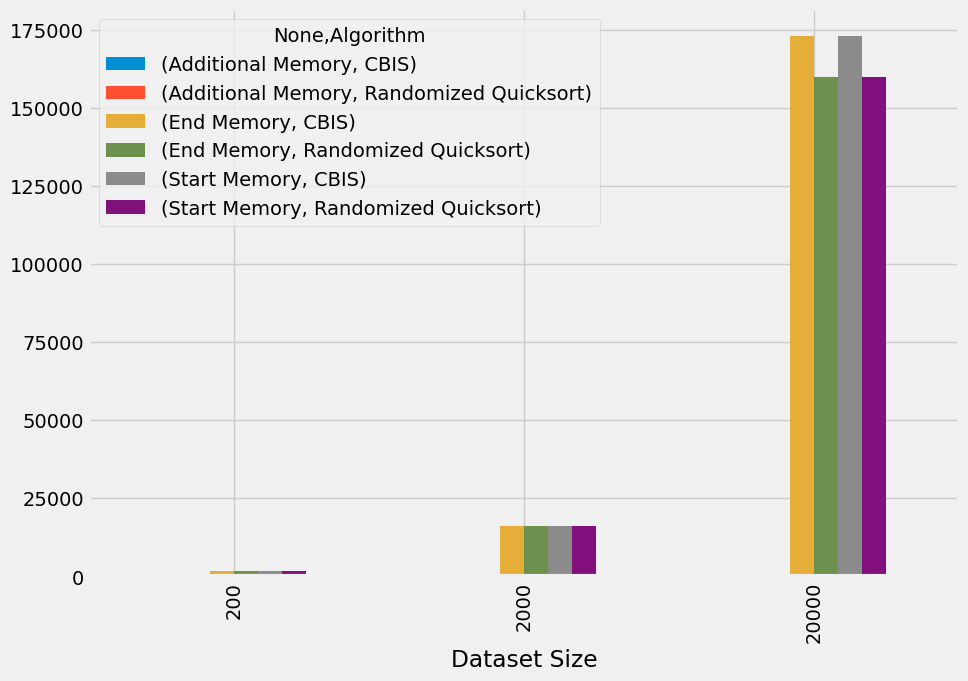

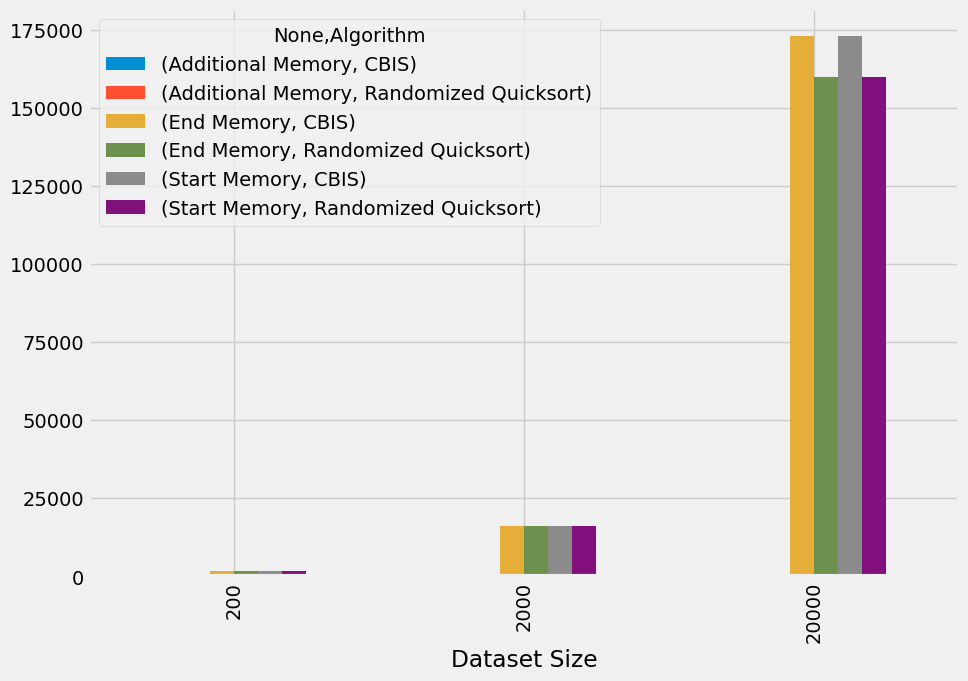

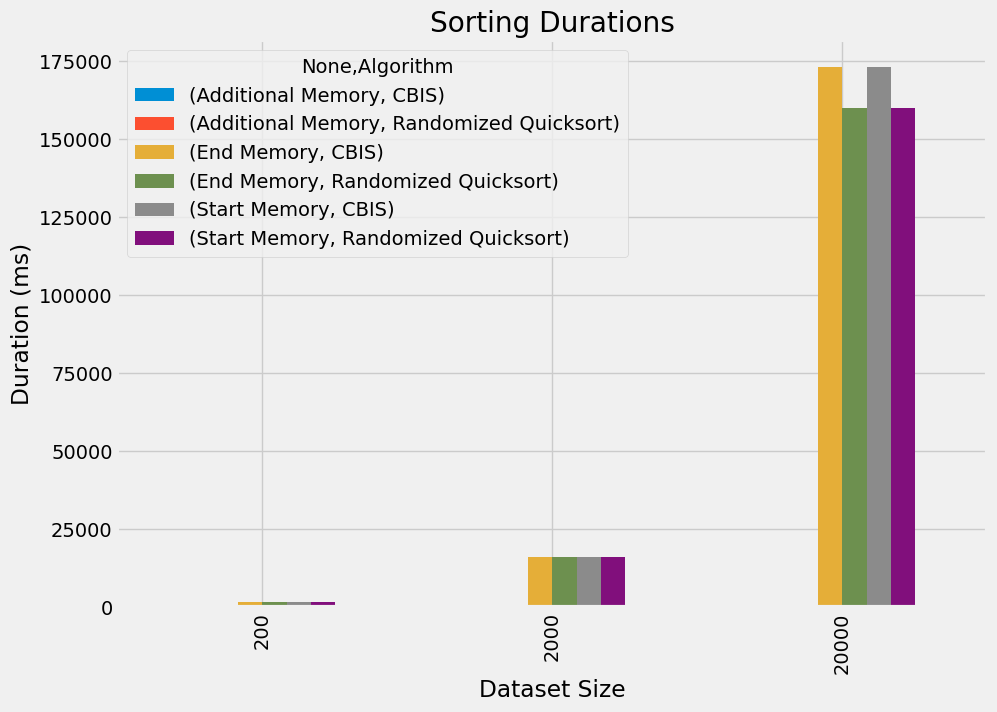

In [11]:
plt.style.use('fivethirtyeight')
df_pivot_memory.loc['Randomized'].plot(kind='bar', figsize=(10, 7)) 
df_pivot_memory.loc['Sorted'].plot(kind='bar', figsize=(10, 7))
df_pivot_memory.loc['Reversed'].plot(kind='bar', figsize=(10, 7))
plt.xlabel('Dataset Size')
plt.ylabel('Duration (ms)')
plt.title('Sorting Durations')
plt.show()